<div>
    <h2>About dataset :</h2>
<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">constructed using data from the National Center for Education Statistics Annual Digest. Table 330.20: Average undergraduate tuition and fees, as well as room and board rates, charged to full-time students at degree-granting postsecondary institutions, by control and level of institution, state or jurisdiction.
</div>
<h2>Content :</h2>
<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
The following data include : 
    <ul>
        <li><strong>Year</strong> : The Digest year this information comes from.</li>
    <li><strong>State</strong>: The U.S. State</li>
        <li><strong>Type</strong> :Type of University, Private or Public and in-state or out-of-state. Private colleges charge the same for in/out of state</li>
        <li><strong>Length</strong> : Whether the college mainly offers 2-year (Associates) or 4-year (Bachelors) programs</li>
        <li><strong>Expense</strong> : The Expense being described, tuition/fees or on-campus living expenses</li>
        <li><strong>Value</strong> : The average cost for this particular expense, in USD $ </li>
    </ul>
</div>
<h2> Table of contents : </h2>
<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
1.Data exploring<br>
2.Data cleaning<br>
3.Data visualization<br>
4.data prediction<br>
</div>

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
<b>1.Data exploring<b><br>
</div>

In [1]:
#Importing libraires :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import missingno as msno
#Styling :
%matplotlib inline
sns.set_theme(style="dark")
plt.rcParams['figure.figsize'] = [30, 7] 
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#Reading data :
df = pd.read_csv("/kaggle/input/average-cost-of-undergraduate-student-by-state-usa/nces330_20.csv")

In [3]:
#Checking data :
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


In [4]:
#Info about data :
print("Shape of data : ",df.shape)
print(df.info()) 

Shape of data :  (3548, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB
None


In [5]:
#Describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3548.0,2016.923337,2.553910,2013.0,2015.00,2017.0,2019.00,2021.0
Value,3548.0,13027.720124,8734.568645,1225.0,7756.75,10203.5,14830.75,49152.0


<AxesSubplot:>

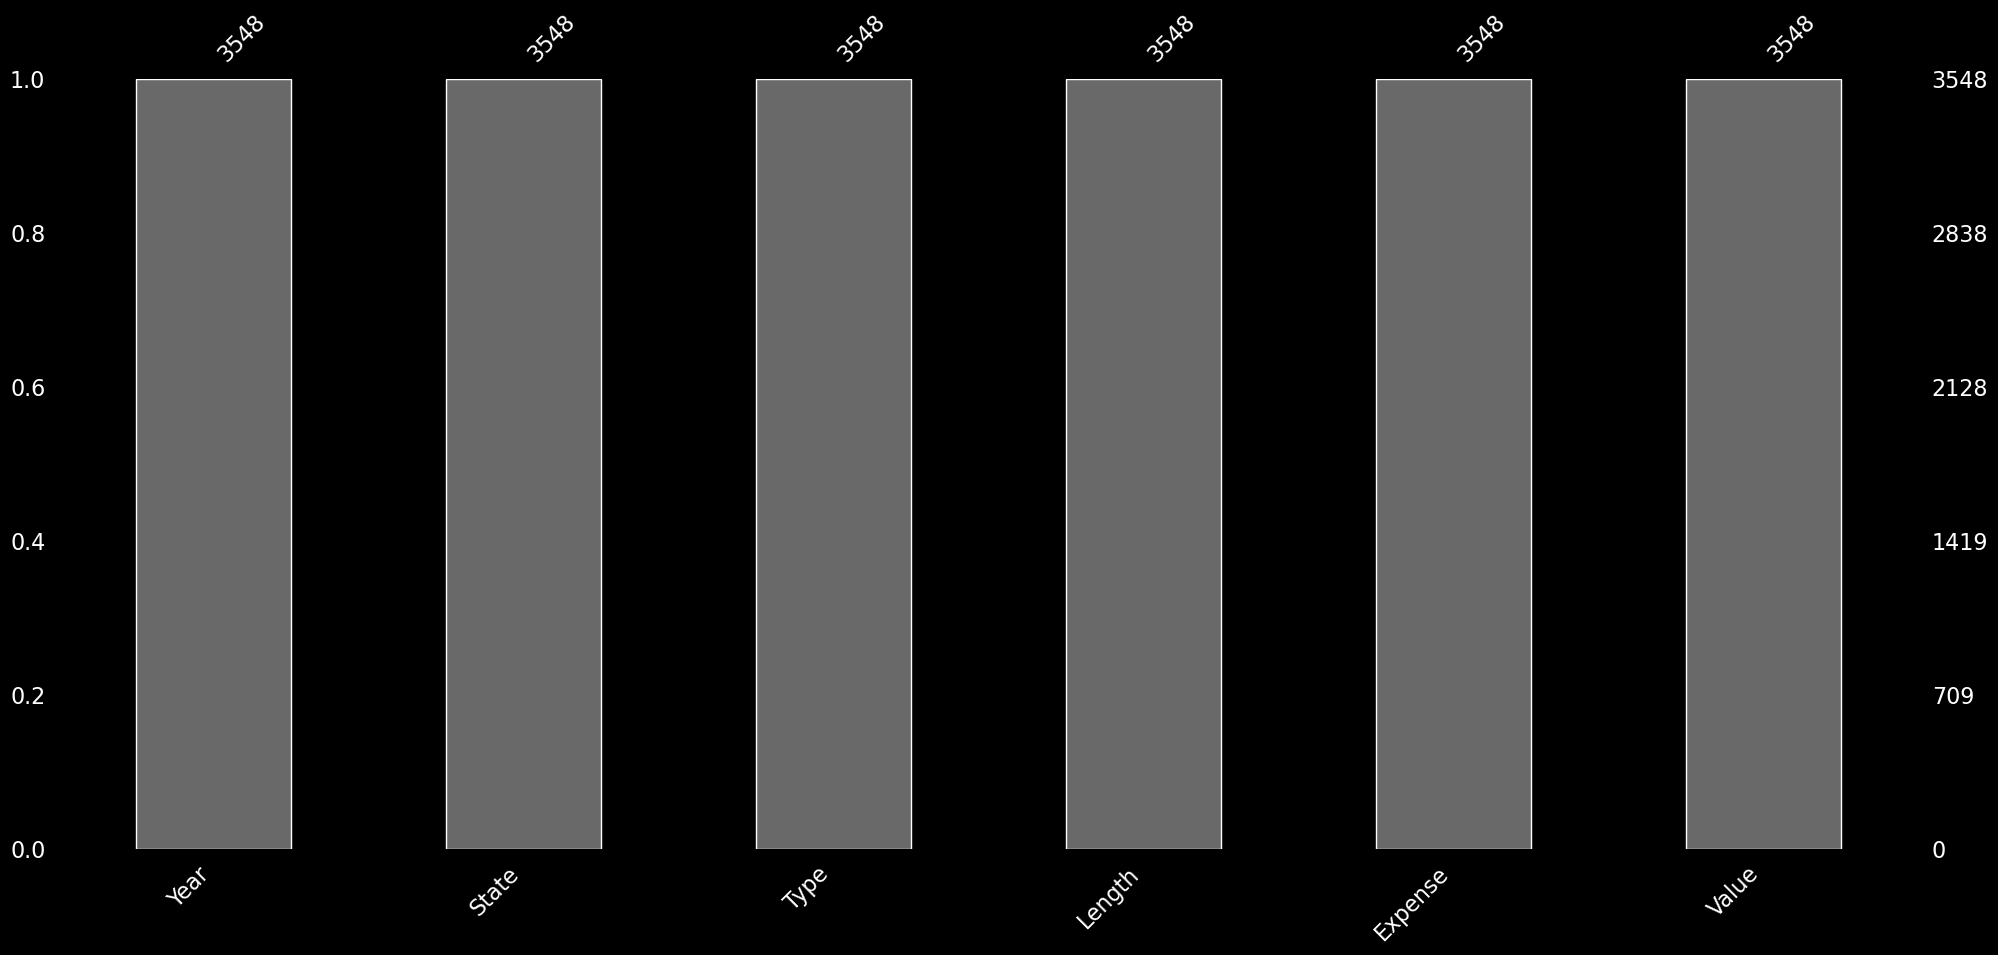

In [6]:
#Checking for missing values :
msno.bar(df)
#For a first look we can say that we dont have any missing values 

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
<b>2.Data cleaning<b><br>
</div>

In [7]:
#We will start data cleaning :
df_copy = df.copy()
#We will start with year :
df["Year"].value_counts()
#We can say that we dont have any problem with Year

2013    403
2014    403
2015    403
2016    403
2017    401
2018    398
2019    396
2020    396
2021    345
Name: Year, dtype: int64

In [8]:
#Move on to State label : 
df["State"].value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

In [9]:
#Creating a column with US state abbreviations so we can use it later :
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',"District of Columbia":"DC"
}
df_copy['State_abbr'] = df_copy['State'].apply(lambda x: us_state_abbrev[x])

In [10]:
#Understanding the type label :
df_copy["Type"].value_counts()
##There is nothing we can do about this column

Public Out-of-State    1347
Public In-State        1296
Private                 905
Name: Type, dtype: int64

In [11]:
#Move on to the length column
df["Length"].value_counts()
#We will keep it as string object as we dont need as int

4-year    2672
2-year     876
Name: Length, dtype: int64

In [12]:
#Checking the Expense column
df_copy["Expense"].value_counts()
#there is nothing we can do about the expense  column

Fees/Tuition    2198
Room/Board      1350
Name: Expense, dtype: int64

In [13]:
#Checking the value column : 
print("min value :",min(df_copy["Value"]))
print("max value : ",max(df_copy["Value"]))
print("mean value : ",df_copy["Value"].mean())

min value : 1225
max value :  49152
mean value :  13027.72012401353


In [14]:
#Changing the name of Expense to expenses_type and Value to expenses
df_copy.rename(columns={'Expense': 'Expense_type','Value':'Expense'}, inplace=True)

In [15]:
#Cleaned data : 
df_copy.head()

,Year,State,Type,Length,Expense_type,Expense,State_abbr
0,2013,Alabama,Private,4-year,Fees/Tuition,13983,AL
1,2013,Alabama,Private,4-year,Room/Board,8503,AL
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048,AL
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073,AL
4,2013,Alabama,Public In-State,4-year,Room/Board,8473,AL


<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
<b>3.Data Visualization<b><br>
</div>

In [16]:
#Start with data visualization
#We will start examine the Year column 
year_grp = df_copy["Year"].value_counts()
fig = px.bar(
    x = year_grp.index,
    y =  year_grp.values,
    color =  year_grp.index,
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  year_grp.values,
    title = "Years distribution",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "year",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ it can be observed that the data is evenly distributed across each year.
</div>

In [17]:
#Comparing the year with the expense :
year_grp = df_copy.groupby("Year").mean().reset_index()
fig = px.bar(
    x = year_grp["Year"],
    y =  year_grp["Expense"].astype(int),
    color =  year_grp["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  year_grp["Expense"].astype(int),
    title = "Average Expense over the years",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "year",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

In [18]:
#Comparing Expense for all types over the years
year_grp = df_copy.groupby("Year").mean().reset_index()
fig = px.line(
    x = year_grp["Year"],
    y =  year_grp["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  year_grp["Expense"].astype(int),
    title = "Expense for all types over the years",
    template = "plotly_dark",
    markers = True
)
fig.update_layout(
    xaxis_title = "year",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ It can be observed that the expenses have been increasing over the years, with a particularly significant increase between 2020 and 2021.
</div>

In [19]:
#Comparing Expense for Public out-of-state type over the years
types = list(df_copy["Type"].value_counts().index)
year_grp = df_copy[df_copy["Type"] == types[0]].groupby("Year").mean().reset_index()
fig = px.line(
    x = year_grp["Year"],
    y =  year_grp["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  year_grp["Expense"].astype(int),
    title = f"Expense for {types[0]} over the years",
    template = "plotly_dark",
    markers = True
)
fig.update_layout(
    xaxis_title = "year",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ It can be observed that the expenses for Public out-of-state uni have been increasing over the years.
</div>

In [20]:
#Comparing Expense for Public in-state type over the years
types = list(df_copy["Type"].value_counts().index)
year_grp = df_copy[df_copy["Type"] == types[1]].groupby("Year").mean().reset_index()
fig = px.line(
    x = year_grp["Year"],
    y =  year_grp["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  year_grp["Expense"].astype(int),
    title = f"Expense for {types[1]} over the years",
    template = "plotly_dark",
    markers = True
)
fig.update_layout(
    xaxis_title = "year",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ The expenses for public in-state universities have been generally increasing over time, although there was a decrease between 2020 and 2021. This trend can be observed.
</div>

In [21]:
#Comparing Expense for Private type over the years
types = list(df_copy["Type"].value_counts().index)
year_grp = df_copy[df_copy["Type"] == types[2]].groupby("Year").mean().reset_index()
fig = px.line(
    x = year_grp["Year"],
    y =  year_grp["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  year_grp["Expense"].astype(int),
    title = f"Expense for {types[2]} over the years",
    template = "plotly_dark",
    markers = True
)
fig.update_layout(
    xaxis_title = "year",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ It can be observed that the expenses for Private uni have been increasing over the years.
</div>

In [22]:
#Type count
tp = df_copy["Type"].value_counts()
fig = px.bar(
    x = tp.index,
    y =  tp.values,
    color =  tp.index,
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  tp.values,
    title = "Type of uni count",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "Type",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
)

In [23]:
#Pie chart on Type  : 
tp = df_copy["Type"].value_counts()
fig = px.pie(
    values = tp.values,
    names = tp.index,
    color_discrete_sequence=px.colors.sequential.PuBu,
    title= 'Type count',template='plotly_dark'
)
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))
fig.show()

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ It can be observed that there are more public universities than private universities in the data.
</div>

In [24]:
#Comparing the type with the expense :
tp= df_copy.groupby("Type").mean().reset_index()
fig = px.bar(
    x = tp["Type"],
    y =  tp["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  tp["Expense"].astype(int),
    title = "Barplot on the Average Expense for each type",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "Type",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

In [25]:
fig = px.box(
    df_copy,
    x="Type",
    y="Expense",
    points = "all",
    title = "Box plot on type and expense",
    template = "plotly_dark",
    )
fig.update_layout(
    xaxis_title = "Type",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)
fig.show()

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️Private universities tend to have higher expenses compared to public universities, while out-of-state expenses for public universities are typically higher than in-state expenses.
</div>

In [26]:
#Pie chart on Length Type  : 
le = df_copy["Length"].value_counts()
fig = px.pie(
    values = le.values,
    names = le.index,
    color_discrete_sequence=px.colors.sequential.PuBu,
    title= 'Length count',template='plotly_dark'
)
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))
fig.show()

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ This data indicates that universities with a four-year program duration are more common than those with a two-year program duration.
</div>

In [27]:
#Length with expense:
le = df_copy.groupby("Length").mean().reset_index()
fig = px.bar(
    df_copy,
    x = le["Length"],
    y =  le["Expense"].astype(int),
    color =  le["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  le["Expense"].astype(int),
    title = "Average Expense depending on year",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "Length",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ According to this data, average expenses associated with four-year programs are higher than those of two-year programs.
</div>

In [28]:
#Parallel Categories Diagram on type and length 
labels = ["Type","Length"]
fig = px.parallel_categories(
    df_copy[labels],
    template= 'plotly_dark',
    title = "Type and length Diagram",
    )
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic")
)
fig.show()

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ Based on the observation of this data, it appears that students enrolled in private universities typically pursue a four-year program, while in public universities, the program duration varies.
</div>

In [29]:
#Type count
et = df_copy["Expense_type"].value_counts()
fig = px.bar(
    x = et.index,
    y =  et.values,
    color =  et.index,
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  et.values,
    title = "Expense type count",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "Expense type",
    yaxis_title = "count",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ This data suggests that the number of tuition/fees is higher than the number of room and board.
</div>

In [30]:
tp= df_copy.groupby("Expense_type").mean().reset_index()
fig = px.bar(
    x = tp["Expense_type"],
    y =  tp["Expense"].astype(int),
    color = tp["Expense"].astype(int),
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  tp["Expense"].astype(int),
    title = "Barplot on the Average Expense for each type",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "Expense type",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

In [31]:
fig = px.box(
    df_copy,
    x="Expense_type",
    y="Expense",
    points = "all",
    title = "Box plot on Expense type and expense",
    template = "plotly_dark",
    )
fig.update_layout(
    xaxis_title = "Expense_type",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)
fig.show()

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ This data suggests that the cost of tuition/fees is higher than the cost of room and board.
</div>

In [32]:
fig = px.choropleth(
    df_copy, 
    locations='State_abbr', 
    locationmode='USA-states',
    color='Expense', 
    scope='usa',
    color_continuous_scale="PuBu",
    template = "plotly_dark",
    title = "Map of Expense per state",
)
fig.show()

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ Based on the data, it appears that there is not a significant variation in expenses across different states
</div>

In [33]:
exp_type = list(df_copy["Expense_type"].value_counts().index)[0]
fig = px.choropleth(
    df_copy[df_copy["Expense_type"] == exp_type], 
    locations='State_abbr', 
    locationmode='USA-states',
    color='Expense', 
    scope='usa',
    color_continuous_scale="PuBu",
    template = "plotly_dark",
    title = f"Map of Expense ({exp_type}) per state",
)
fig.show()

In [34]:
exp_type = list(df_copy["Expense_type"].value_counts().index)[1]
fig = px.choropleth(
    df_copy[df_copy["Expense_type"] == exp_type], 
    locations='State_abbr', 
    locationmode='USA-states',
    color='Expense', 
    scope='usa',
    color_continuous_scale="PuBu",
    template = "plotly_dark",
    title = f"Map of Expense ({exp_type}) per state",
)
fig.show()

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
🗨️ The data indicates that there is variation in (fees/tuition) and (Room/Board) expenses across different states.
</div>

In [35]:
top_10 = df_copy.groupby(by="State").mean().reset_index().sort_values(by="Expense",ascending=False)[:11]
fig = px.bar(
    x = top_10["State"],
    y =  top_10["Expense"],
    color = top_10["Expense"],
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  top_10["Expense"].astype(int),
    title = "TOP 10 Average expenses states",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "State",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

In [36]:
exp_type = list(df_copy["Expense_type"].value_counts().index)[0]
top_10 = df_copy[df_copy["Expense_type"] == exp_type].groupby(by="State").mean().reset_index().sort_values(by="Expense",ascending=False)[:11]
fig = px.bar(
    x = top_10["State"],
    y =  top_10["Expense"],
    color = top_10["Expense"],
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  top_10["Expense"].astype(int),
    title = f"TOP 10 Average expenses ({exp_type}) states",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "State",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

In [37]:
exp_type = list(df_copy["Expense_type"].value_counts().index)[1]
top_10 = df_copy[df_copy["Expense_type"] == exp_type].groupby(by="State").mean().reset_index().sort_values(by="Expense",ascending=False)[:11]
fig = px.bar(
    x = top_10["State"],
    y =  top_10["Expense"],
    color = top_10["Expense"],
    color_discrete_sequence = px.colors.sequential.PuBu,
    text =  top_10["Expense"].astype(int),
    title = f"TOP 10 Average expenses ({exp_type}) states",
    template = "plotly_dark"
)
fig.update_layout(
    xaxis_title = "State",
    yaxis_title = "Expense",
    font = dict(size=17,family="Franklin Gothic")
)

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
<b>4.Data predicting : <b><br>
</div>

In [38]:
## Data predicting :
from sklearn.model_selection import train_test_split
#Spliting data
#Droping the State or the State_abbr since its the same
#Converting Year to str :
df_copy["Year"] = df_copy["Year"].astype(str)
X = df_copy.drop(["Expense","State"],axis=1)
y = df_copy["Expense"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [39]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [40]:
#Data pre-processing : 
#I will transform all the cols (even the Year since its categorial) using oneHotEncoder:
encoder = OneHotEncoder()
#Getting cols to be transformed :
cols = list(X_train.columns)
preprocessing = ColumnTransformer(
    transformers = [
        ("all_cols",encoder,cols)
    ],
    remainder="passthrough"
)
linear_reg_pipeline = Pipeline(
    [
        ("preprocessing",preprocessing),
        ("regressor",LinearRegression())
    ]
)
linear_reg_pipeline.fit(X_train,y_train)
score_test = linear_reg_pipeline.score(X_test,y_test)

In [41]:
y_pred = linear_reg_pipeline.predict(X_test)

In [42]:
print("Test score : ",score_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Test score :  0.674462460273551
RMSE:  4835.5031336048105


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

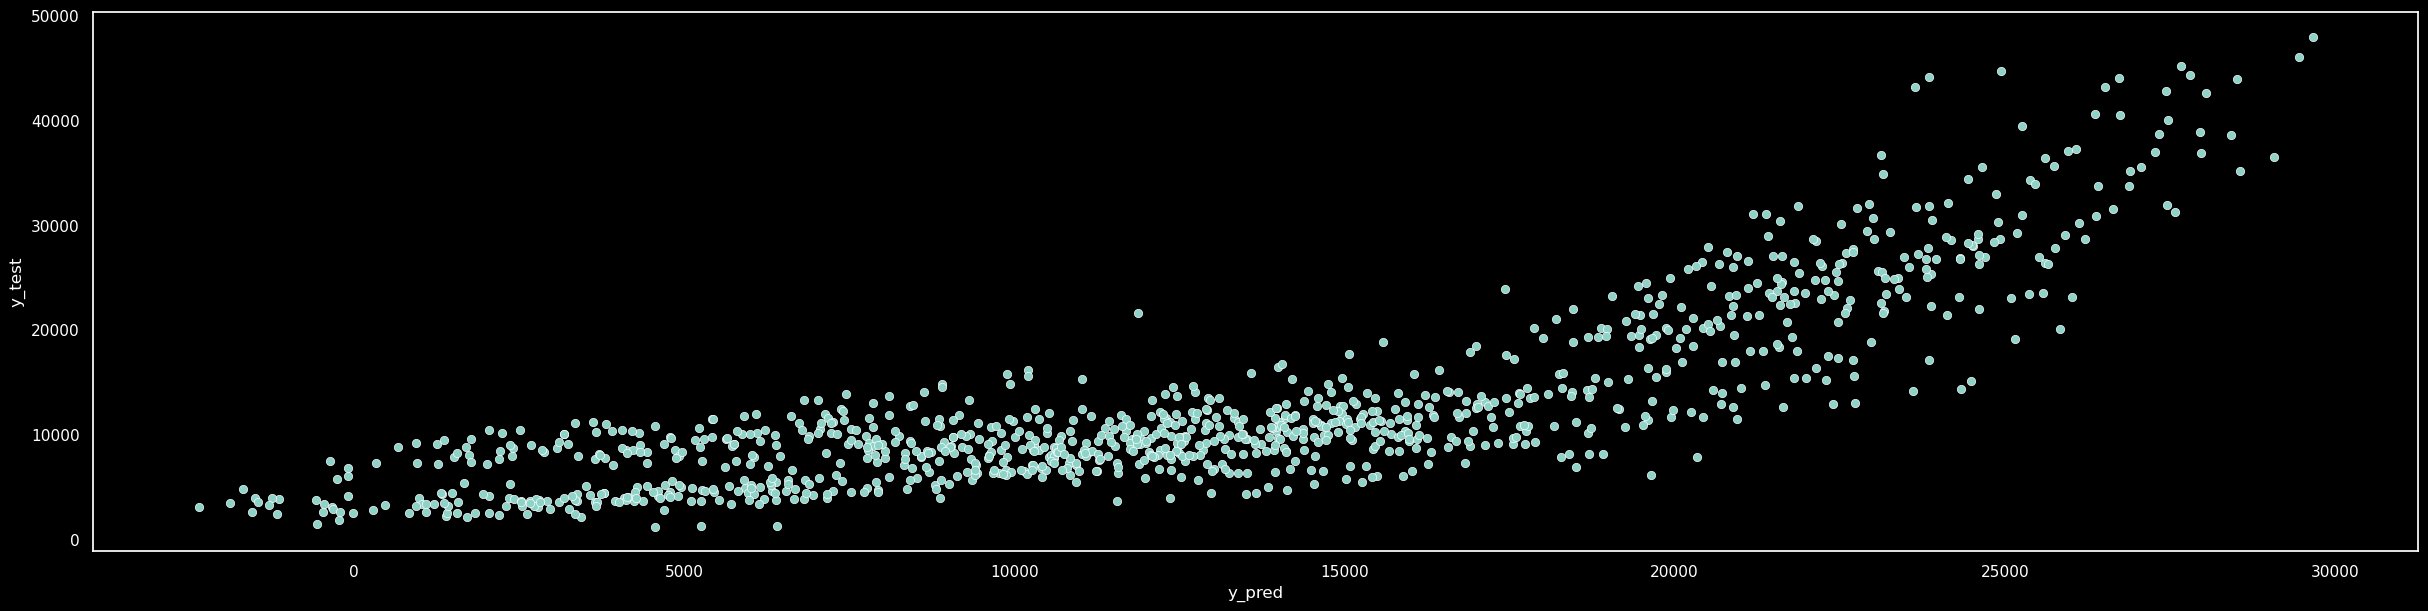

In [43]:
df_pred = pd.DataFrame({"y_pred":y_pred,"y_test":y_test})
sns.scatterplot(data=df_pred,x="y_pred",y="y_test")

<div style="background-color:#f1faee;color:#1d3557;padding:10px;border:2px solid #1d3557;font-size:1.3em;border-radius:10px">
<b>Thanks for watching !<br> Dont forget to upvote !<b><br>
    </div>